In [7]:
from packages.display.core import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [12]:
%qtconsole

# Testing Band 9

## Creation of Data Cubes

Creation of the Synthetic Data Cubes ALMA-like using ASYDO Project.
Parameters:

 - isolist    : subset of the list of isotopes to generate a cube

 cube_params:

 - freq    : spectral center (frequency)
 - alpha   : right-ascension center (degrees
 - delta   : declination center (degrees
 - spe_res : spectral resolution (MHz)
 - spe_bw  : spectral bandwidth (MHz)
 - s_f, s_a : skew-normal distrib, s_f: full width at half maximum, alpha: curtosis parameter. 

In [2]:
cube_params = {
  'freq'     : 604000,
  'alpha'    : 0,
  'delta'    : 0,
  'spe_bw'   : 4000,
  'spe_res'  : 1,
  's_f'      : 8,
  's_a'      : 0}

To select the isolist, the wavelength range of the cube is obtained, and a searching from theoretical catalog Splatalogue is performed. All the isotopes that have spectral lines on the range of the cube are determinated.

In [4]:
# freq_init = cube_params['freq'] - cube_params['spe_bw']/2.0
# freq_end = cube_params['freq'] + cube_params['spe_bw']/2.0

# molist_present = theoretical_presence(molist, freq_init, freq_end)

Then, we get all the possible combination sets of the previously determined isotopes.

In [5]:
# all_subsets = sum(map(lambda r: list(combinations(molist_present, r)),
#                                 range(1, len(molist_present)+1)), [])

Finally, random sets previously determinated are selected in order to generate the data cubes.

In [6]:
# random_index = np.random.randint(len(all_subsets), size=25)

# isolist = []
# for i in random_index:
#     isolist.append(all_subsets[i])
    
# save_isolist(isolist)

In [4]:
isolist = load_isolist()

### Generate Datacubes in Band 9, Fixed Width

In [5]:
log=open('data/isolist_fixed_width.log', 'w')
cube_n = 0
cube_name = 'data/cube_fixed_width_'
for i in range(0, 25):

    # Creation of the cube
    gen_cube(isolist[i], cube_params, cube_name + str(cube_n))
    log.write(cube_name + ': ' + str(isolist[i]) + '\n')
    cube_n += 1
log.close()

        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [astropy.utils.decorators]
        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead.


### Generate Datacubes in Band 9, Variable (TO DO: Fix variable width in ASYDO) Width

In [6]:
log=open('data/isolist_variable_width.log', 'w')
cube_n = 25
cube_name = 'data/cube_variable_width_'
for i in range(0, 25):

    # Creation of the cube
    gen_cube_variable_width(isolist[i], cube_params, cube_name + str(cube_n))   
    log.write(cube_name + ': ' + str(isolist[i]) + '\n')
    cube_n += 1
log.close()

## Creation of Dictionary

We create the words necessary to fit a sparse coding model to the observed spectra in the previous created cube.
It returns a DataFrame with a vector for each theoretical line for each isotope in molist

In [10]:
# dictionary = gen_words(molist, cube_params)
# save_dictionary(dictionary, 'band_9')

In [11]:
# dictionary = gen_words(molist, cube_params, True)
# save_dictionary(dictionary, 'band_9_dual')

In [14]:
dictionary = load_dictionary('band_9')

In [73]:
dictionary = load_dictionary('band_9_dual')

## Recalibration of Dictionary

In [16]:
confusion_matrix = []
results = []

In [74]:
for i in range(0, 50):
    if (i == 0):
        cube_name = 'data/cube_fixed_width_'
    if (i == 25):
        cube_name = 'data/cube_variable_width_'
        
    file_path = cube_name + str(i) + '.fits'
    
    train_pixel = (1, 1)
    dictionary_recal, detected_peaks = recal_words(file_path, dictionary, cube_params, 4)
    
    X = get_values_filtered_normalized(file_path, train_pixel, cube_params)

    y_train = get_fortran_array(np.asmatrix(X))
    dictionary_recal_fa = np.asfortranarray(dictionary_recal,
                                            dtype= np.double)
    
    lambda_param = 0
    for idx in range(0, len(detected_peaks)):
        if detected_peaks[idx] != 0:
            lambda_param += 1
    
    param = {
      'lambda1' : lambda_param,
      # 'L': 1,
      'pos' : True,
      'mode' : 0,
      'ols' : True,
      'numThreads' : -1}
    
    alpha = spams.lasso(y_train, dictionary_recal_fa, **param).toarray()
    total = np.inner(dictionary_recal_fa, alpha.T)
    
    # if i == 0:
    #     confusion_matrix = [get_confusion_matrix(dictionary_recal, alpha,
    #                                file_path, cube_params, True)]
    #     results = [get_results(confusion_matrix[i])]
    # else:
    confusion_matrix.append(get_confusion_matrix(dictionary_recal, alpha,
                                               file_path, cube_params, True))
    results.append(get_results(confusion_matrix[100 + i]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


# Testing Band 7

### Generate Datacubes in Band 7, Fixed Width

In [45]:
cube_params['freq'] = 277000

In [23]:
log=open('data/isolist_fixed_width.log', 'w')
cube_n = 50
cube_name = 'data/cube_fixed_width_'
for i in range(0, 25):
    # Creation of the cube
    gen_cube(isolist[i], cube_params, cube_name + str(cube_n))
    log.write(cube_name + ': ' + str(isolist[i]) + '\n')
    cube_n += 1
log.close()

### Generate Datacubes in Band 7, Variable (TO DO: Fix variable width in ASYDO) Width

In [24]:
log=open('data/isolist_fixed_width.log', 'w')
cube_n = 75
cube_name = 'data/cube_variable_width_'
for i in range(0, 25):
    # Creation of the cube
    gen_cube_variable_width(isolist[i], cube_params, cube_name + str(cube_n))

    log.write(cube_name + ': ' + str(isolist[i]) + '\n')
    cube_n += 1
log.close()

## Creation of Dictionary

In [19]:
# dictionary = gen_words(molist, cube_params)
# save_dictionary(dictionary, 'band_7')

In [20]:
# dictionary = gen_words(molist, cube_params, True)
# save_dictionary(dictionary, 'band_7_dual')

In [25]:
dictionary = load_dictionary('band_7')

In [44]:
dictionary = load_dictionary('band_7_dual')

### Training

### Recalibration of the Dictionary

In [63]:
for i in range(75, 100):
    if (i == 50):
        cube_name = 'data/cube_fixed_width_'
    if (i == 75):
        cube_name = 'data/cube_variable_width_'
        
    file_path = cube_name + str(i) + '.fits'
    
    train_pixel = (1, 1)
    dictionary_recal, detected_peaks = recal_words(file_path, dictionary, cube_params, 4)
    
    X = get_values_filtered_normalized(file_path, train_pixel, cube_params)

    y_train = get_fortran_array(np.asmatrix(X))
    dictionary_recal_fa = np.asfortranarray(dictionary_recal,
                                            dtype= np.double)
    
    lambda_param = 0
    for idx in range(0, len(detected_peaks)):
        if detected_peaks[idx] != 0:
            lambda_param += 1
    
    param = {
      'lambda1' : lambda_param,
      # 'L': 1,
      'pos' : True,
      'mode' : 0,
      'ols' : True,
      'numThreads' : -1}
    
    alpha = spams.lasso(y_train, dictionary_recal_fa, **param).toarray()
    total = np.inner(dictionary_recal_fa, alpha.T)
    
  
    confusion_matrix.append(get_confusion_matrix(dictionary_recal, alpha,
                                           file_path, cube_params, True))
    results.append(get_results(confusion_matrix[i]))
    print(i)

75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### Testing

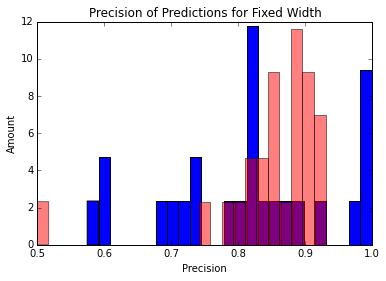

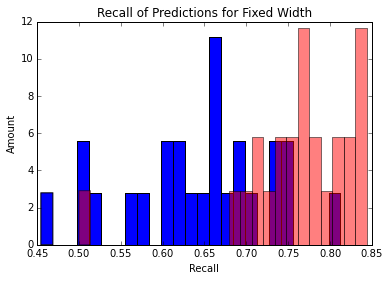

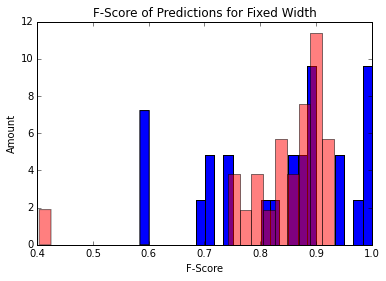

In [80]:
plt.title("Precision of Predictions for Fixed Width")
plt.xlabel("Precision")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Precision"]) for means in results[100:125]], 25, normed=True, color='b', alpha=1, label='Band 9')
plt.hist([np.mean(means["Precision"]) for means in results[50:75]], 25, normed=True, color='r', alpha=0.5, label='Band 7')
plt.show()

plt.title("Recall of Predictions for Fixed Width")
plt.xlabel("Recall")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Recall"]) for means in results[100:125]], 25, normed=True, color='b', alpha=1, label='Band 9')
plt.hist([np.mean(means["Recall"]) for means in results[50:75]], 25, normed=True, color='r', alpha=0.5, label='Band 7')
plt.show()

plt.title("F-Score of Predictions for Fixed Width")
plt.xlabel("F-Score")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["F-Score"]) for means in results[100:125]], 25, normed=True, color='b', alpha=1, label='Band 9')
plt.hist([np.mean(means["F-Score"]) for means in results[50:75]], 25, normed=True, color='r', alpha=0.5, label='Band 7')
plt.show()

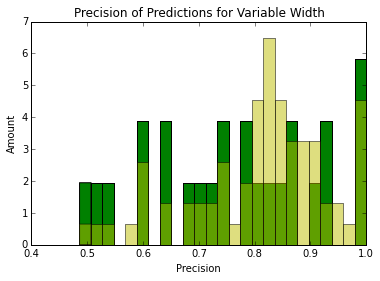

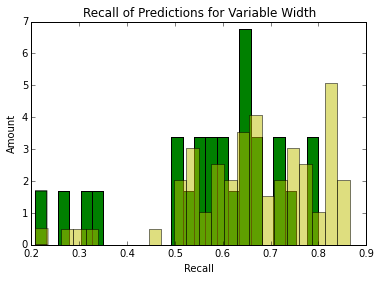

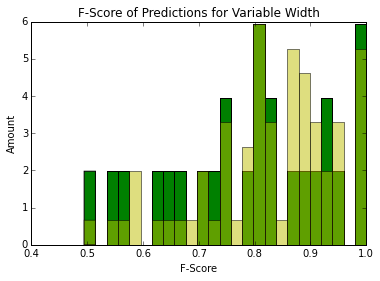

In [81]:
plt.title("Precision of Predictions for Variable Width")
plt.xlabel("Precision")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Precision"]) for means in results[125:150]], 25, normed=True, color='g', alpha=1, label='Band 9')
plt.hist([np.mean(means["Precision"]) for means in results[75:]], 25, normed=True, color='y', alpha=0.5, label='Band 7')
plt.show()

plt.title("Recall of Predictions for Variable Width")
plt.xlabel("Recall")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Recall"]) for means in results[125:150]], 25, normed=True, color='g', alpha=1, label='Band 9')
plt.hist([np.mean(means["Recall"]) for means in results[75:]], 25, normed=True, color='y', alpha=0.5, label='Band 7')
plt.show()

plt.title("F-Score of Predictions for Variable Width")
plt.xlabel("F-Score")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["F-Score"]) for means in results[125:150]], 25, normed=True, color='g', alpha=1, label='Band 9')
plt.hist([np.mean(means["F-Score"]) for means in results[75:]], 25, normed=True, color='y', alpha=0.5, label='Band 7')
plt.show()

Blending case

C:\Python\2.7\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


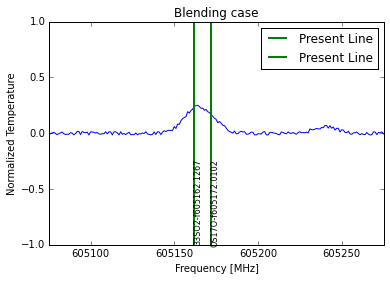

In [8]:
file_path = "data/cube_fixed_width_6.fits"
train_pixel = (1, 1)
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.legend(loc='upper right')
plt.xlim(xmin = 605075, xmax = 605275)
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
current_isotopes = [""]
for line in lines:
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])
    if isotope_frequency in range(605075, 605275) \
    and line[0] not in current_isotopes:
        # Shows lines really present
        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g', linewidth=2, label='Present Line')
        plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')
        current_isotopes.append(line[0])

plt.title("Blending case")
plt.xlabel("Frequency [MHz]")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ylabel("Normalized Temperature")
plt.legend()
plt.show()

Hyperfine lines case

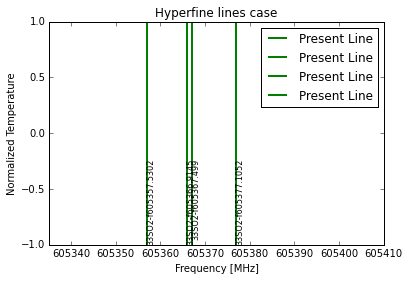

In [31]:
file_path = "data/cube_fixed_width_6.fits"
train_pixel = (1, 1)
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.legend(loc='upper right')
plt.xlim(xmin = 605335, xmax = 605410)
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
for line in lines:
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])
    if isotope_frequency in range(605335, 605410):
        # Shows lines really present
        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g', linewidth=2, label='Present Line')
        plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')

plt.title("Hyperfine lines case")
plt.xlabel("Frequency [MHz]")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ylabel("Normalized Temperature")
plt.legend()
plt.show()

Double peaks for single Line

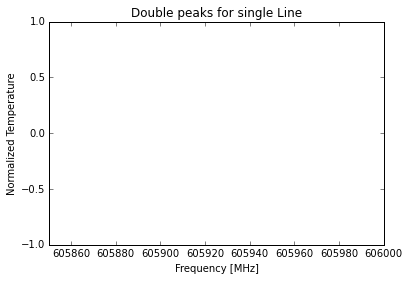

In [70]:
file_path = "data/cube_fixed_width_13.fits"
train_pixel = (1, 1)
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.legend(loc='upper right')
plt.xlim(xmin = 605850, xmax = 606000)
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
for line in lines:
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])
    if isotope_frequency in range(605850, 606000):
        # Shows lines really present
        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g', linewidth=2, label='Present Line')
        plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')

plt.title("Double peaks for single Line")
plt.xlabel("Frequency [MHz]")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ylabel("Normalized Temperature")
plt.legend()
plt.show()

In [83]:
np.mean([np.mean(means["F-Score"]) for means in results[50:150]])

0.82863388211965838

In [85]:
[np.mean(means["F-Score"]) for means in results[50:150]]

[0.89168468862529915,
 0.79193875269988412,
 0.75200326140878448,
 0.81639109147301347,
 0.87879208585544066,
 0.92887290632013153,
 0.85086000388735472,
 0.84071068041046548,
 0.7722850251874398,
 0.79639009827264384,
 0.88633042348486957,
 0.89612361280960229,
 0.83699052694806542,
 0.88415327545129008,
 0.93197359061560947,
 0.90201707881625082,
 0.84717545401660277,
 0.90059359791974669,
 0.89337993883460309,
 0.85040295619469053,
 0.40381889119976039,
 0.89262559480876513,
 0.92239019444973747,
 0.7515821143438518,
 0.87038173421462128,
 0.9081769326014496,
 0.79911020658211762,
 0.81104333268417472,
 0.79497063464437656,
 0.86555058506318283,
 0.91115903467815551,
 0.81416927477986079,
 0.8035920072651449,
 0.84907730176119744,
 0.76713653367166945,
 0.93955894557506869,
 0.86106292550121633,
 0.94376962866847436,
 0.92105015595004336,
 0.83607034163212468,
 0.79276010480813364,
 0.8816800719522796,
 0.81056532868934028,
 0.86522984998466534,
 0.87961792356857349,
 0.827467310701

In [86]:
np.mean([np.mean(means["F-Score"]) for means in results[111:150]])

0.81129490729519405